# HOUSE PRICE PREDICTION 



### As we all know predicting the price is one of the most important factor for the middle class families 
#### So in this file i tried to predict the price of the house depending on the different factors .

In [1]:
import numpy as np  # for the 
import pandas as pd  # basic input/output 
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization
import warnings  # for removing the warning errors
warnings.filterwarnings('ignore')

#### Firstly we need to import the data for different analysis 

In [82]:
# here out data is divided into two part one is for training and another is for testing 

In [83]:
data_train  = pd.read_csv('train.csv') # importing the training  data from local drive
data_test = pd.read_csv('test.csv') # importing the data

In [84]:
data_train.head(2) # to see the head of the data here 2 is used for showing the no. of rows in the data 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [85]:
data_train.tail(5) # tail is used to see the rows from the downward 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [86]:
print('The no. of rows and columns in the datset respectively are ' ,data_train.shape) 

The no. of rows and columns in the datset respectively are  (1460, 81)


In [87]:
frames = [data_train,data_test]
d1 = pd.concat(frames,axis = 0)
d1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [88]:
d1.shape

(2919, 81)

In [89]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [90]:

# from above we can see that alley,fence ,poolqc,miscfeature are having null values more then 80% so we can drop them 
d1.SalePrice.mean()

180921.19589041095

In [91]:
col = d1.columns[d1.isna().mean() >0.8]
col

Index(['Alley', 'Fence', 'MiscFeature', 'PoolQC'], dtype='object')

In [92]:
d2 = d1.copy()

In [93]:
d1.drop(col,axis=1,inplace = True)

In [94]:
count=0
for i in d1.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is ',round((count/len(d1.index))*100),'%','of the data rows we cannot do droping rowwise')

Total number of rows with missing values is  2336
since it is  80 % of the data rows we cannot do droping rowwise


In [95]:
d1.shape

(2919, 77)

In [96]:
# exploratory data analysis # data visualization 

     

In [97]:
cat = list(d1.select_dtypes(['object']).columns)
len(cat)

39

In [98]:
num = list(d1.select_dtypes(['int64','float64']))
len(num)

38

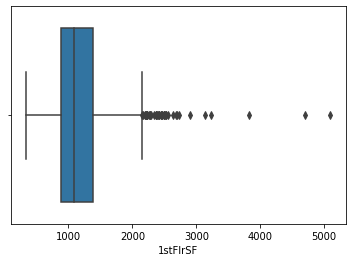

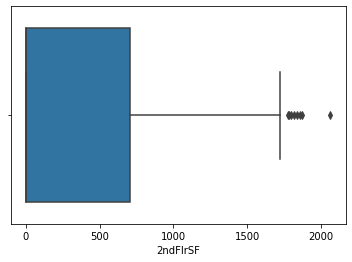

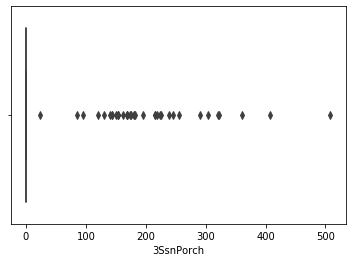

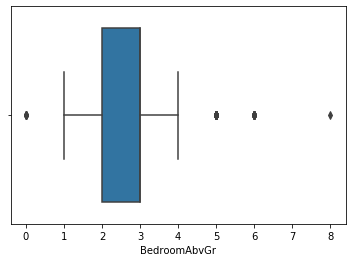

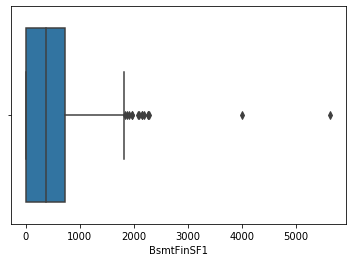

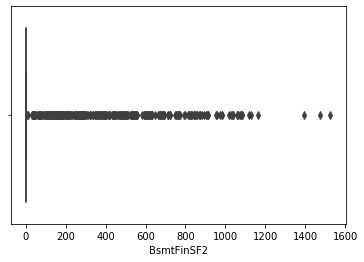

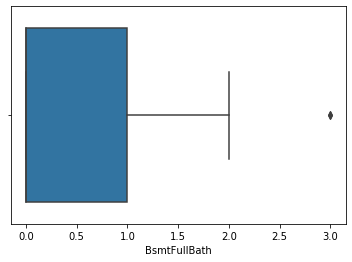

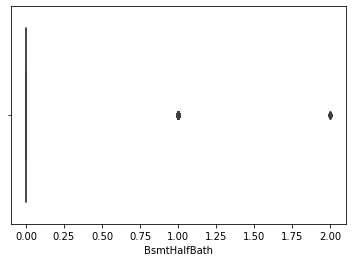

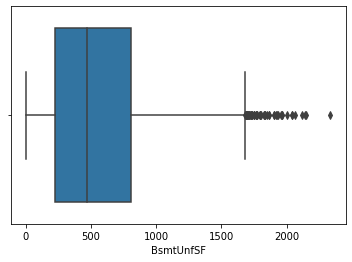

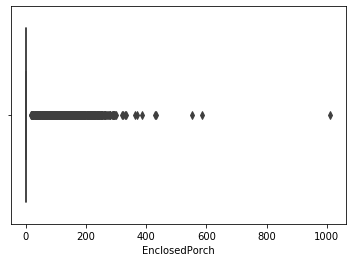

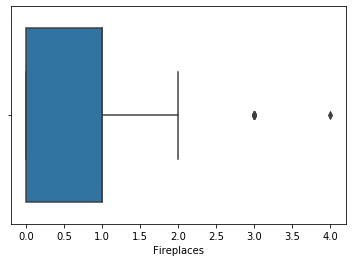

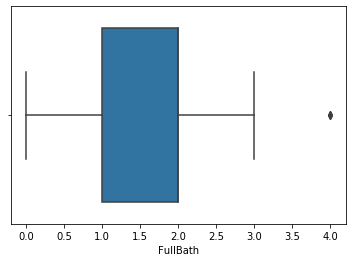

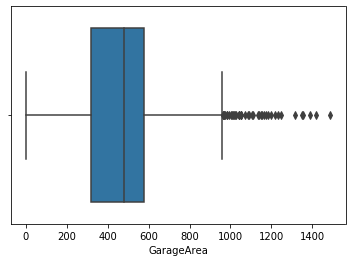

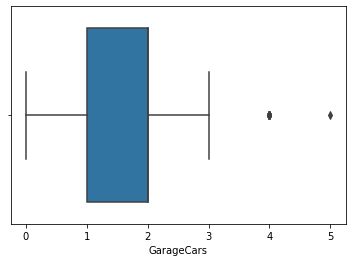

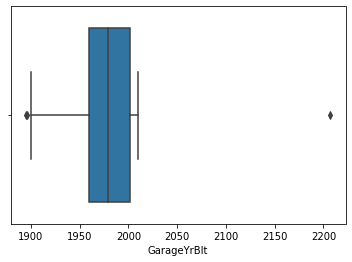

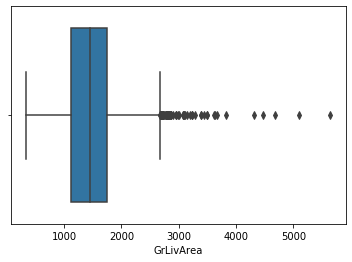

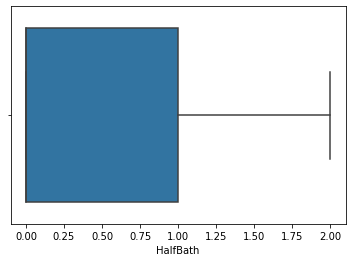

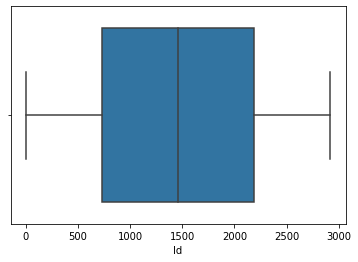

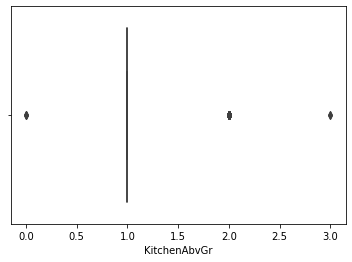

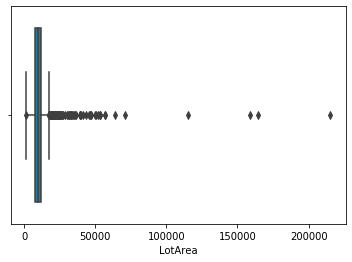

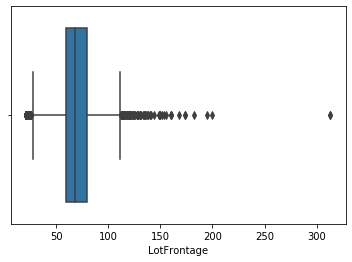

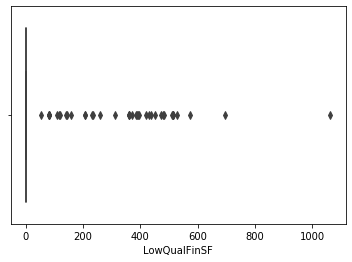

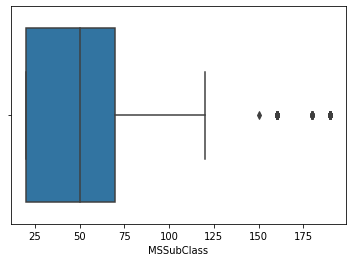

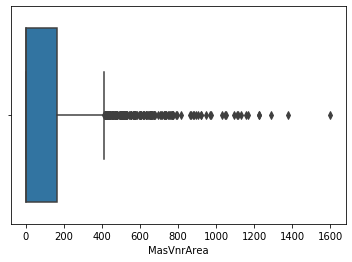

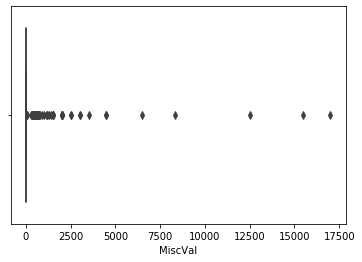

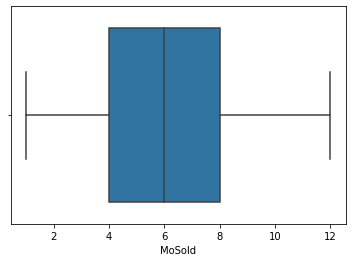

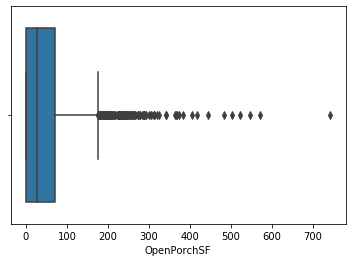

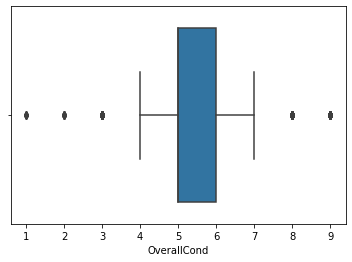

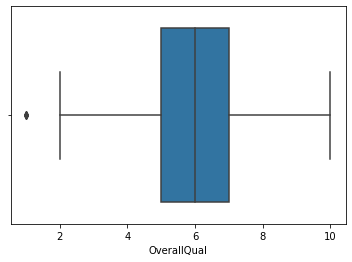

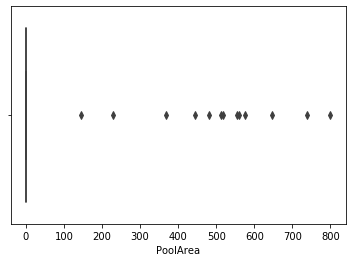

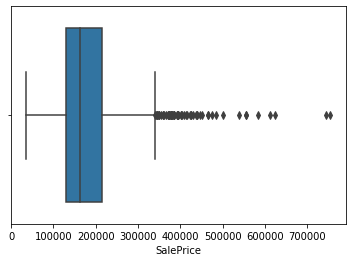

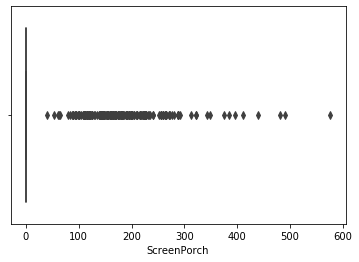

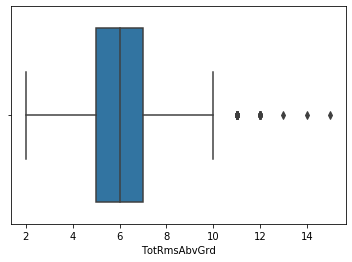

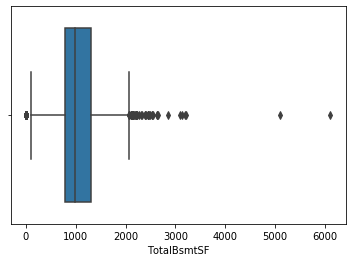

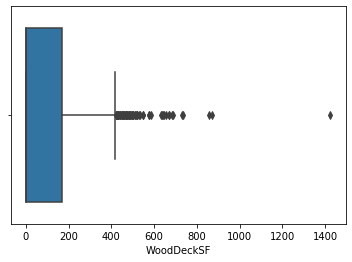

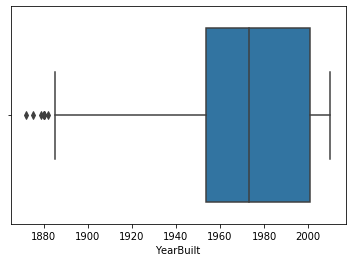

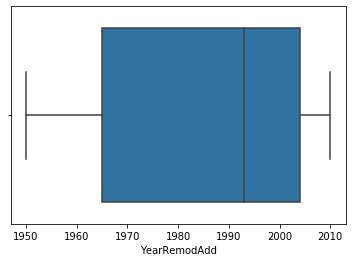

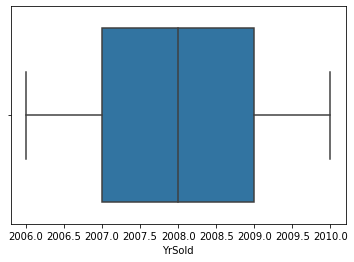

In [99]:
for i in num:    # 3SsnPorch,BsmtFinSF2,BsmtHalfBath,EnclosedPorch,LowQualFinSF,MiscVal
    sns.boxplot(d1[i])
    plt.show()
    

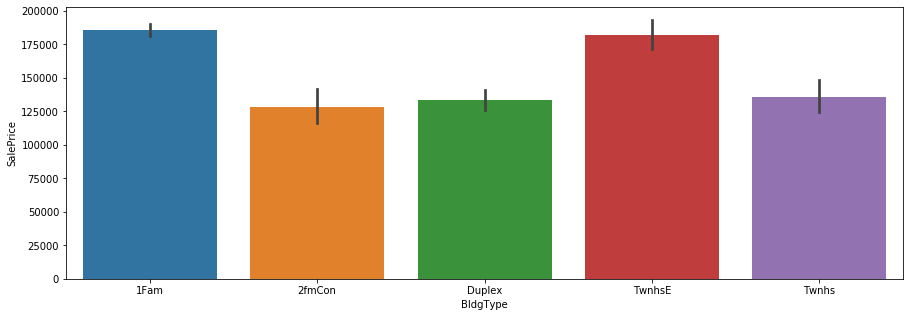

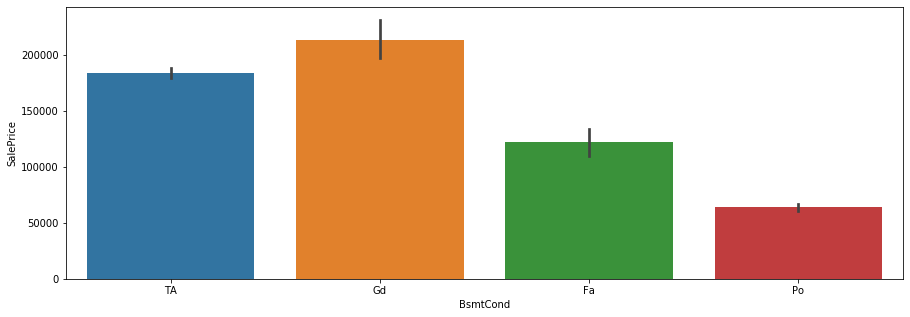

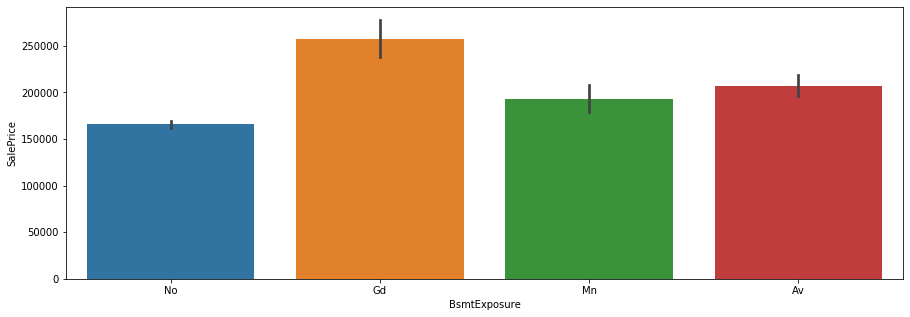

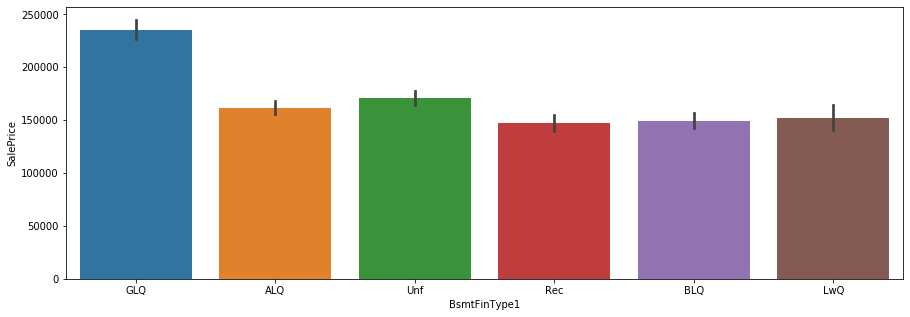

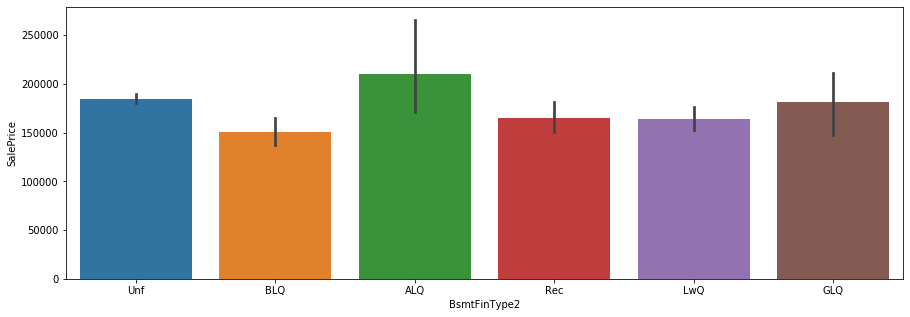

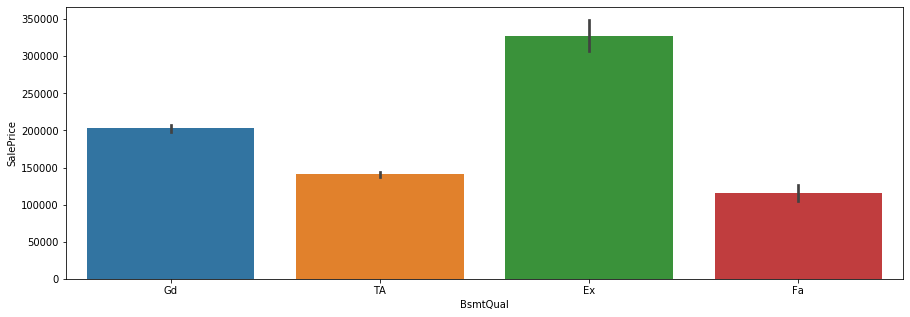

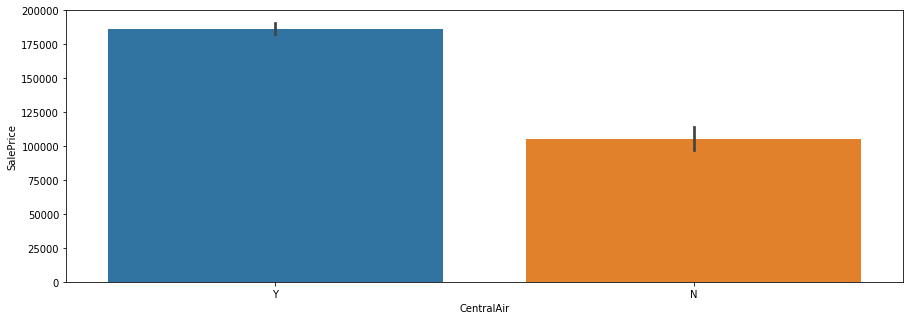

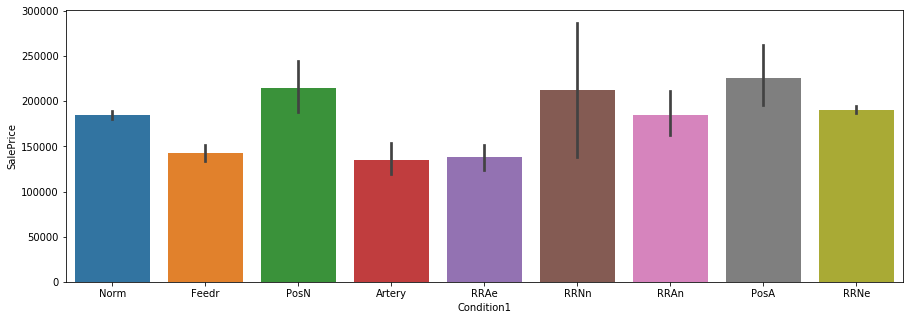

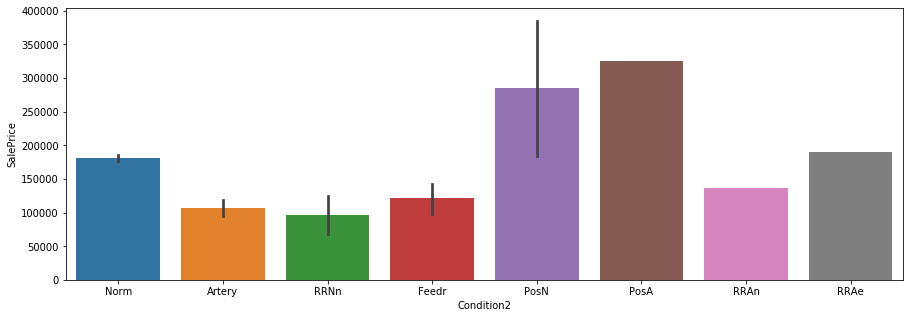

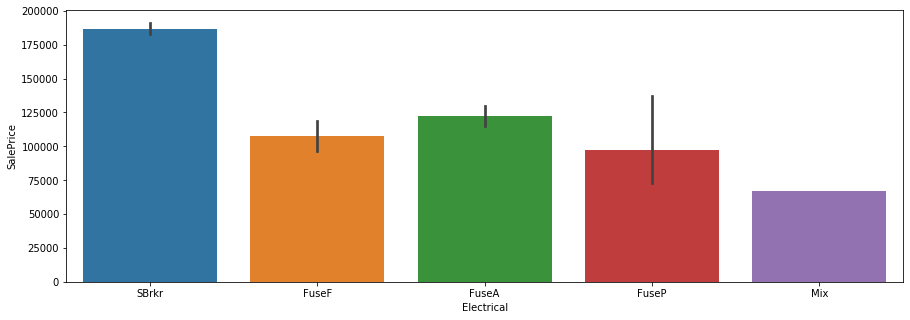

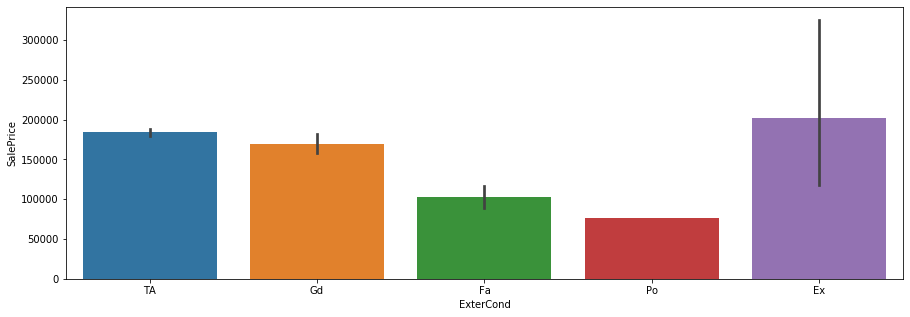

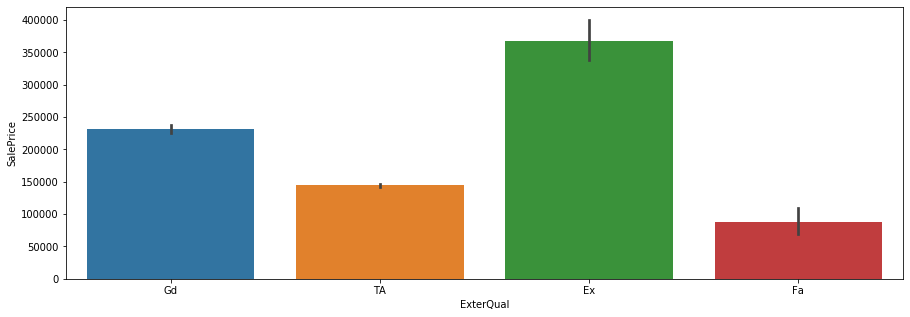

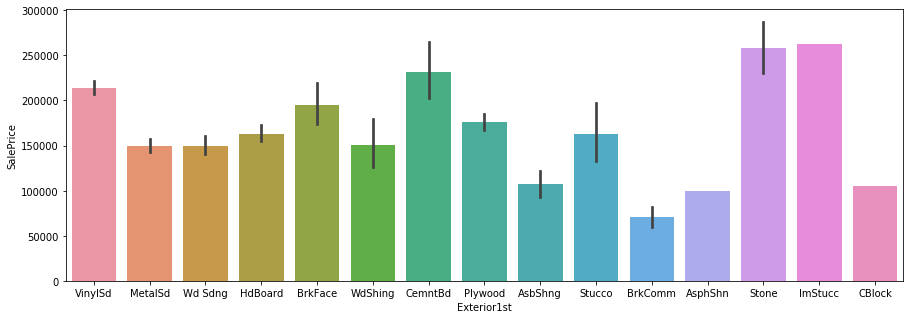

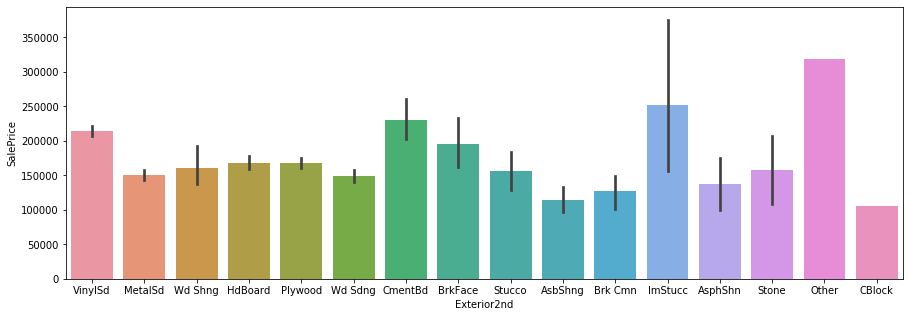

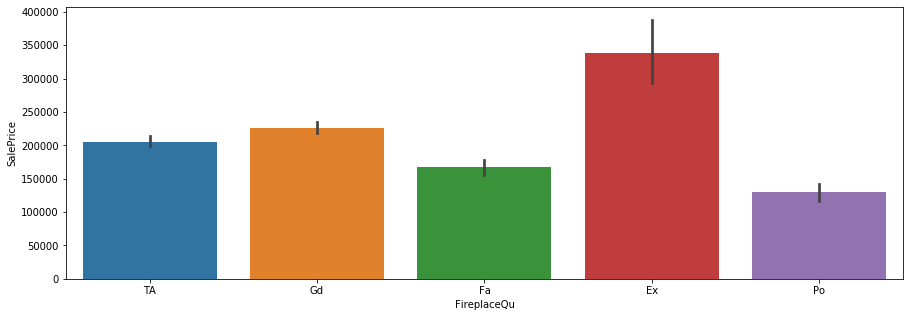

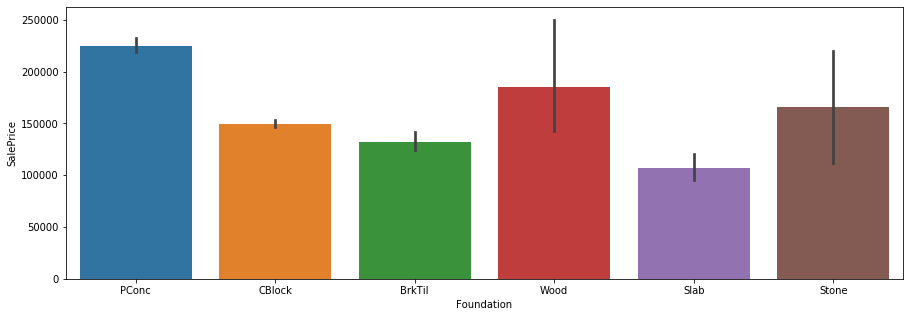

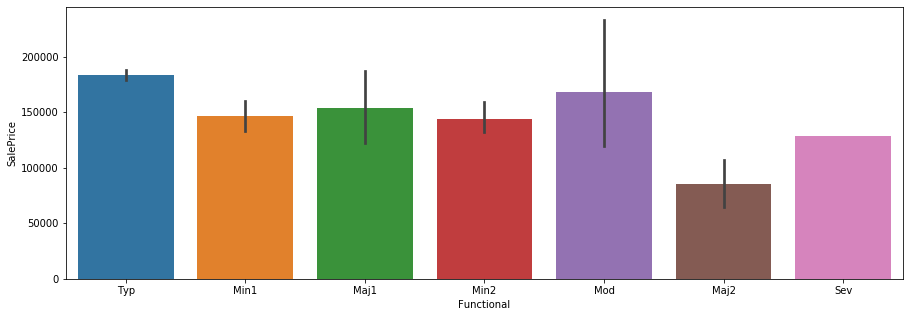

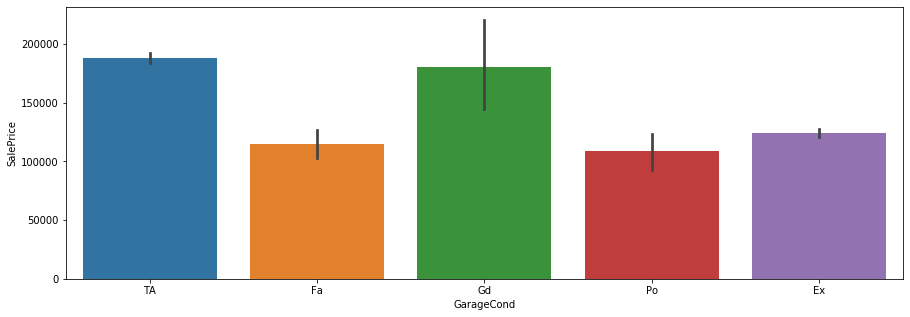

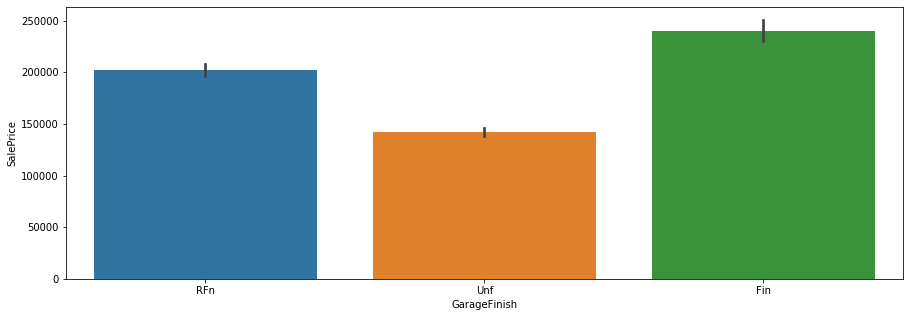

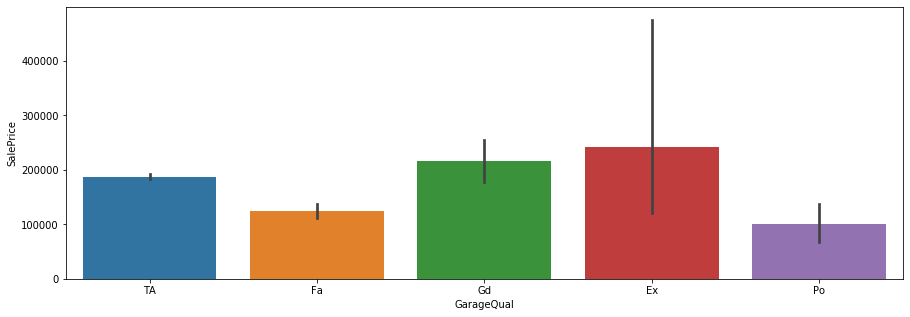

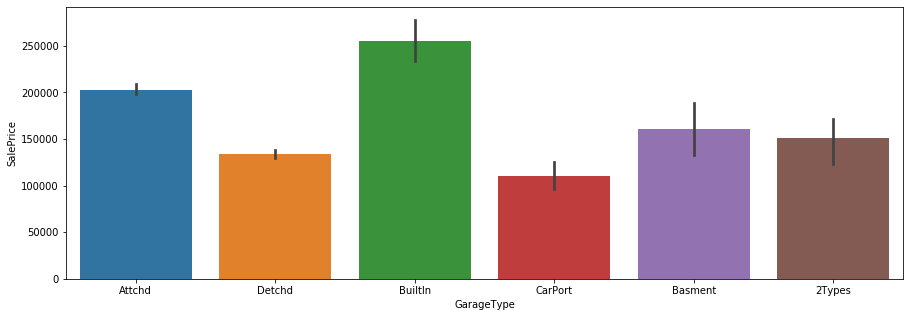

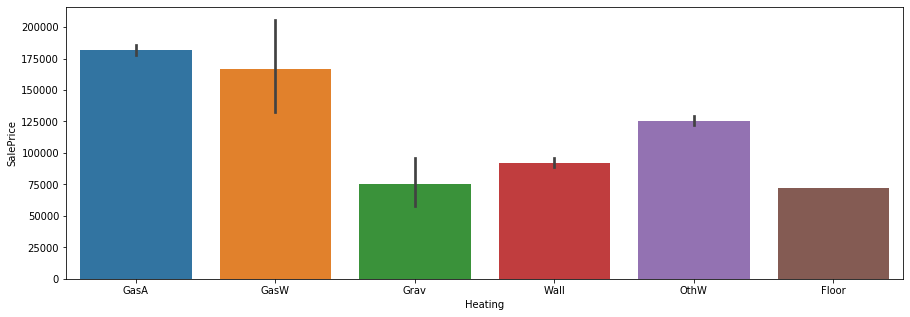

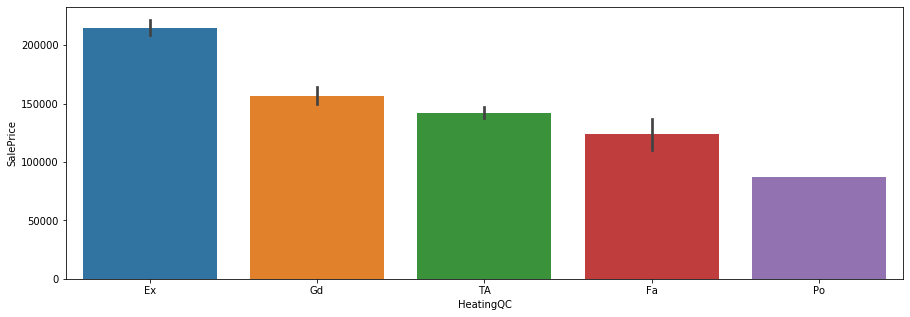

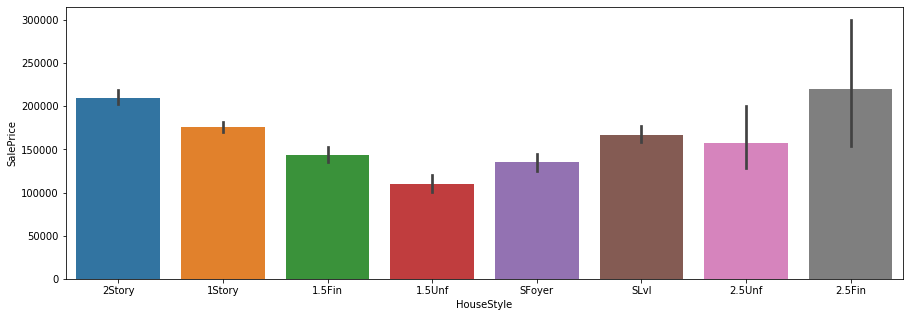

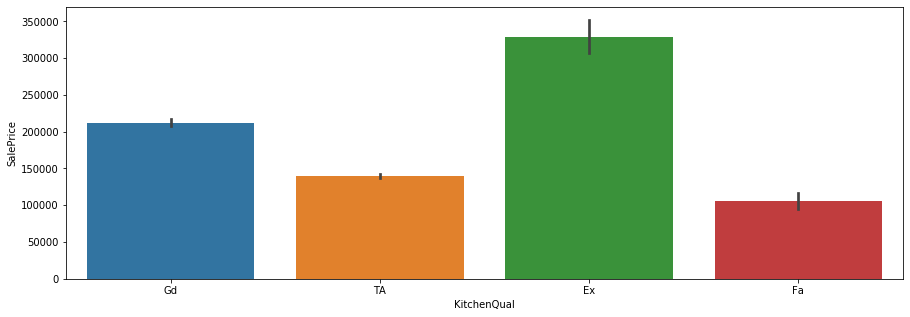

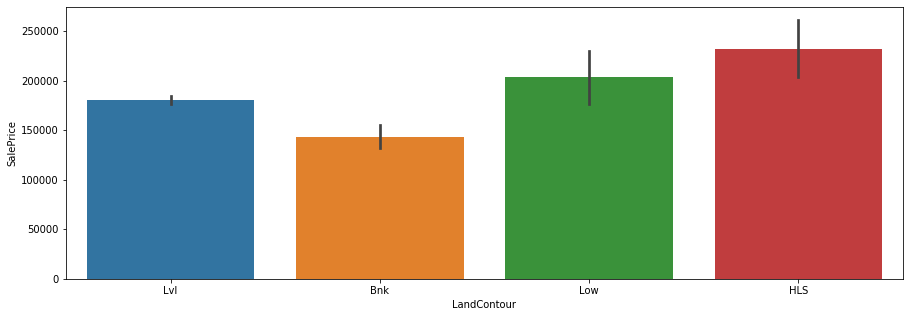

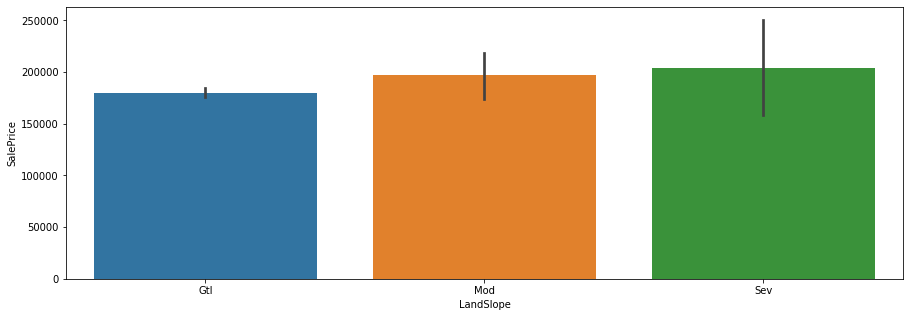

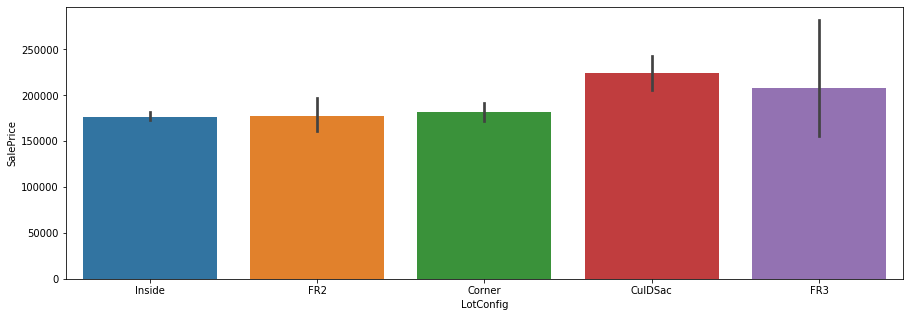

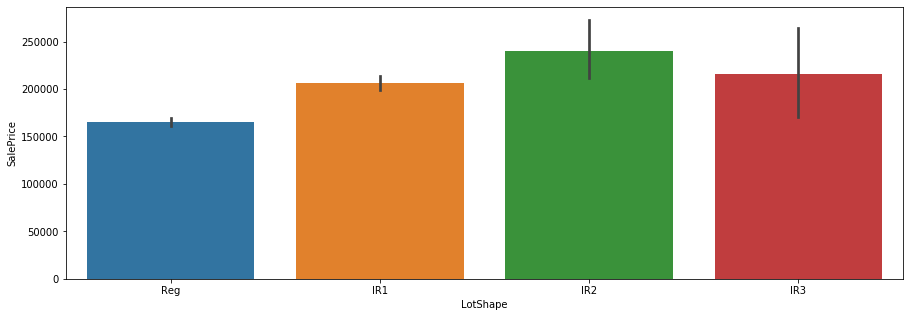

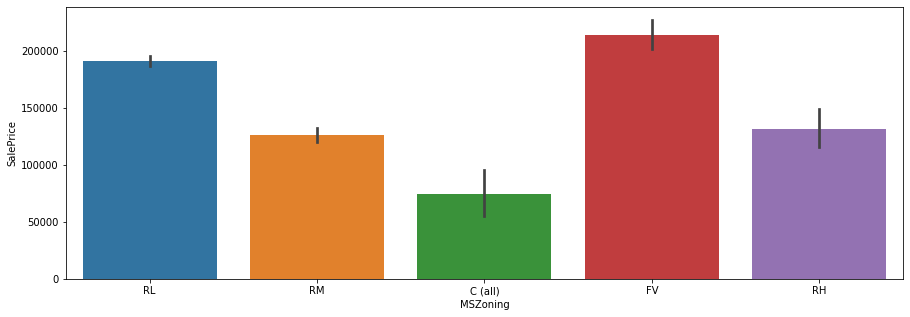

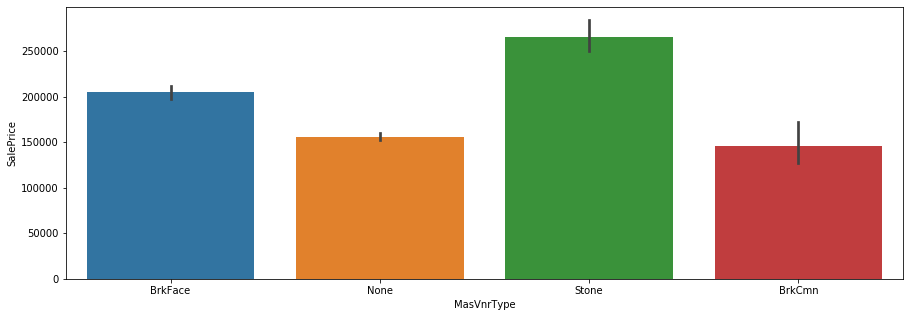

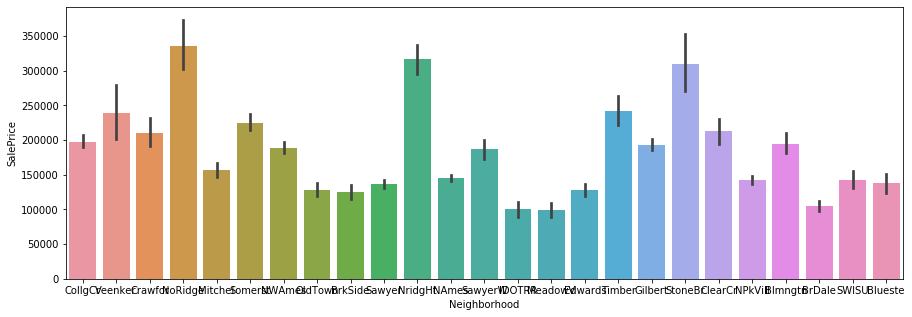

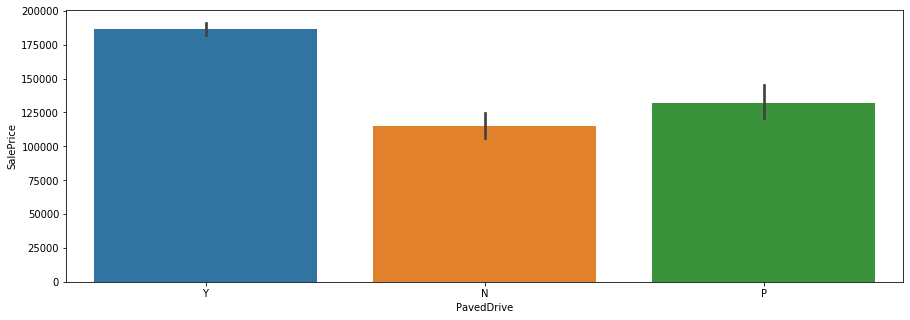

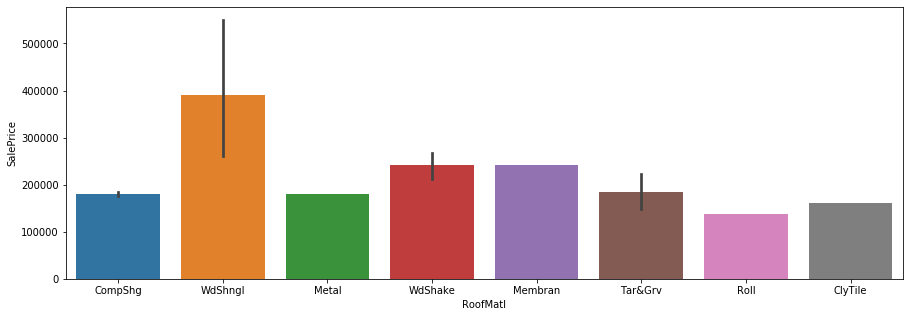

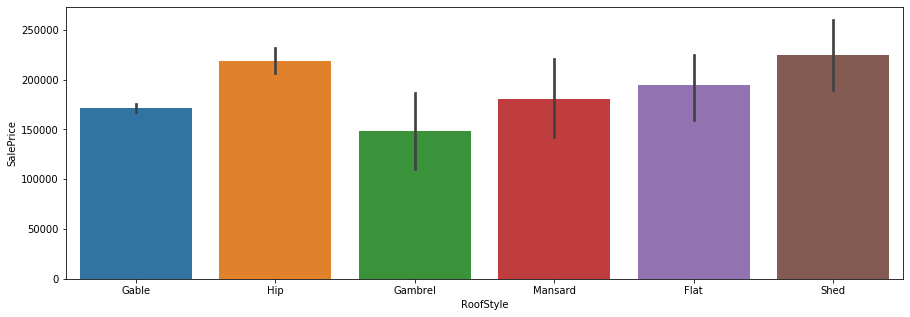

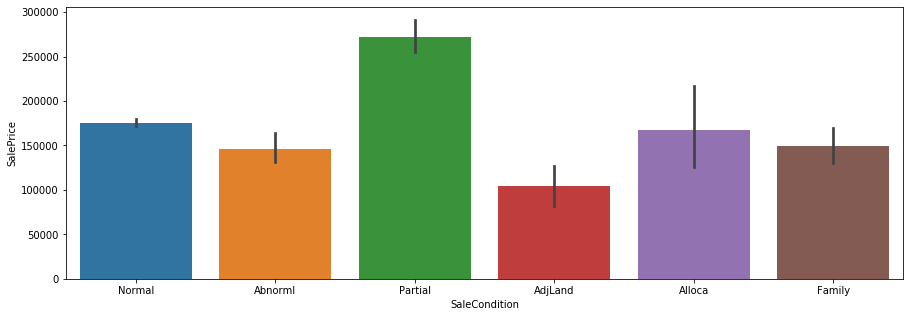

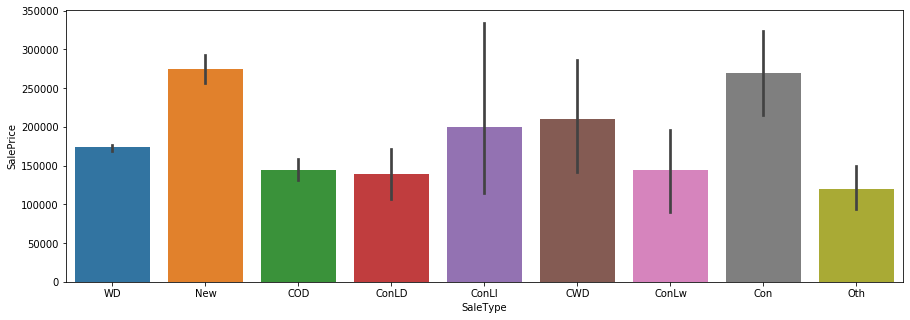

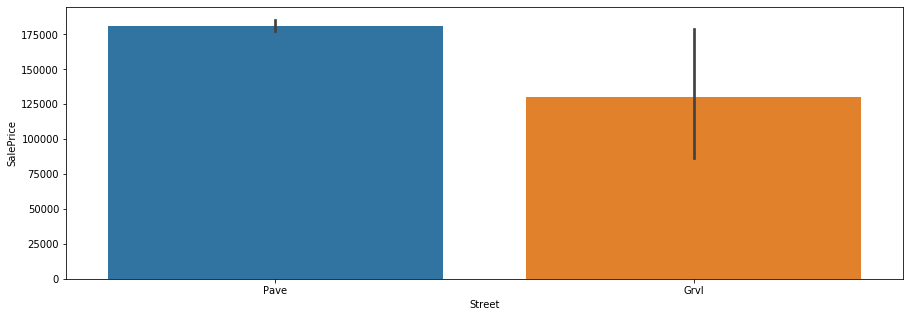

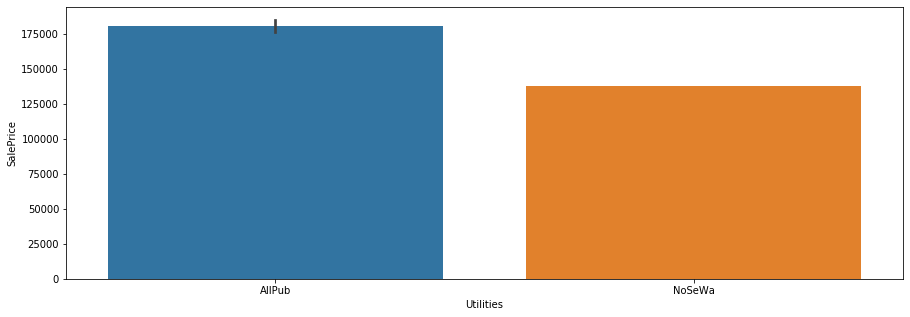

In [100]:
for i in cat:
    figure = plt.figure(figsize=(15,5))
    sns.barplot(x = d1[i], y ='SalePrice' ,data =d1 )
    plt.show()

In [101]:
# null value treatment 
pd.set_option('max_rows',80)
d1.isna().sum()/len(d1)*100

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageType        5.378554
GarageYrBlt       5.447071
GrLivArea         0.000000
H

In [24]:
d1.head()
d1.shape

(2919, 77)

In [102]:
d1['BsmtCond'].fillna('TA',inplace = True)

In [107]:
d1['BsmtExposure'].fillna('No',inplace = True)

In [109]:
d1['BsmtFinSF1'].fillna(0,inplace = True)

In [110]:
d1['BsmtFinSF2'].fillna(0,inplace = True)

In [112]:
d1['BsmtFinType1'].fillna('Unf',inplace = True)

In [115]:
d1['BsmtFinType2'].fillna('Unf',inplace = True)

In [117]:
d1['BsmtFullBath'].fillna(0.0,inplace = True)

In [119]:
d1['BsmtHalfBath'].fillna(0.0,inplace =True)

In [121]:
d1['BsmtQual'].fillna('Gd',inplace = True)

In [123]:
d1['BsmtUnfSF'].fillna(0,inplace = True)

In [125]:
d1['Electrical'].fillna('SBrkr',inplace= True)

In [127]:
d1['Exterior1st'].fillna('VinylSd',inplace=True)

In [129]:
d1['Exterior2nd'].fillna('VinylSd',inplace=True)

In [131]:
d1['FireplaceQu'].fillna('Gd',inplace = True)

In [133]:
d1['Functional'].fillna('Typ',inplace=True)

In [135]:
d1['GarageArea'].fillna(0,inplace =True)

In [137]:
d1['GarageCars'].fillna(2.0,inplace=True)

In [139]:
d1['GarageCond'].fillna('TA',inplace=True)

In [140]:
d1['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [141]:
d1.drop('Utilities',axis =1,inplace = True)

In [143]:
d1['TotalBsmtSF'].fillna(0,inplace = True)

In [145]:
d1['SaleType'].fillna('WD',inplace =True)

In [147]:
d1['MasVnrType'].fillna('None',inplace=True)

In [149]:
d1.drop('MasVnrArea',axis=1,inplace=True)

In [151]:
d1['MSZoning'].fillna('RL',inplace=True)

In [153]:
d1['LotFrontage'].fillna(60,inplace=True)

In [155]:
d1['KitchenQual'].fillna('TA',inplace=True)

In [157]:
d1['GarageYrBlt'].fillna(2005,inplace=True)

In [159]:
d1['GarageType'].fillna('Attchd',inplace=True)

In [161]:
d1.drop('GarageQual',axis =1 , inplace=True)

In [163]:
d1['GarageFinish'].fillna('Unf',inplace=True)

In [164]:
num_cols=d1.select_dtypes(include=['float64','int64']).columns
num_cols=num_cols[0:78]

In [165]:
col = d1.columns[d1.isna().mean() >0.0]
col

Index(['SalePrice'], dtype='object')

In [166]:
type(num_cols)

pandas.core.indexes.base.Index

In [167]:
for cols in num_cols:
    q1=d1[cols].quantile(0.1)
    q2=d1[cols].quantile(0.5)
    q3=d1[cols].quantile(0.9)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    d1[cols]=d1[cols].apply(lambda x:ul if x>ul else x )
    d1[cols]=d1[cols].apply(lambda x:ll if x<ll else x )

In [168]:
count=0
for cols in num_cols:
    q1=d1[cols].quantile(0.1)
    q2=d1[cols].quantile(0.5)
    q3=d1[cols].quantile(0.9)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    print(cols)
    print(d1[d1[cols]>ul][cols].count())
    print(d1[d1[cols]<ll][cols].count())
    print()
    count=count+1

1stFlrSF
0
0

2ndFlrSF
0
0

3SsnPorch
0
0

BedroomAbvGr
0
0

BsmtFinSF1
0
0

BsmtFinSF2
0
0

BsmtFullBath
0
0

BsmtHalfBath
0
0

BsmtUnfSF
0
0

EnclosedPorch
0
0

Fireplaces
0
0

FullBath
0
0

GarageArea
0
0

GarageCars
0
0

GarageYrBlt
0
0

GrLivArea
0
0

HalfBath
0
0

Id
0
0

KitchenAbvGr
0
0

LotArea
0
0

LotFrontage
0
0

LowQualFinSF
0
0

MSSubClass
0
0

MiscVal
0
0

MoSold
0
0

OpenPorchSF
0
0

OverallCond
0
0

OverallQual
0
0

PoolArea
0
0

SalePrice
0
0

ScreenPorch
0
0

TotRmsAbvGrd
0
0

TotalBsmtSF
0
0

WoodDeckSF
0
0

YearBuilt
0
0

YearRemodAdd
0
0

YrSold
0
0



In [169]:
d1.to_csv('outlier capping')


In [170]:
data = pd.read_csv('outlier capping')

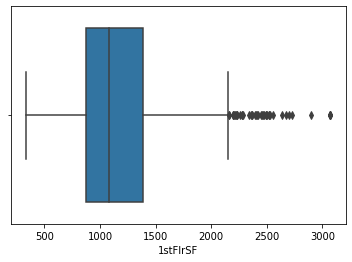

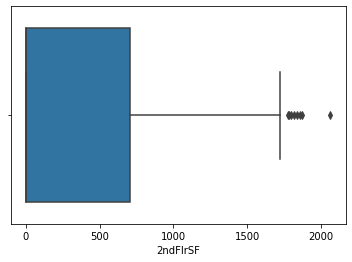

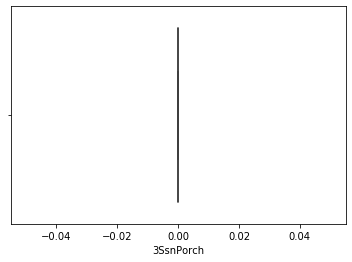

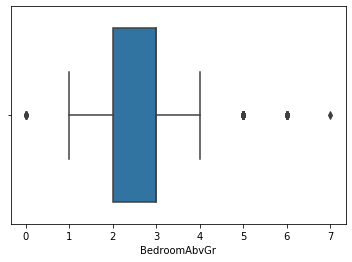

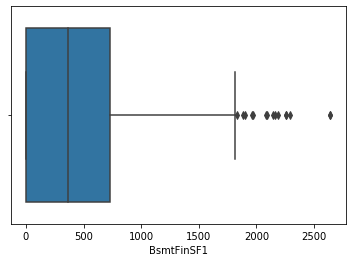

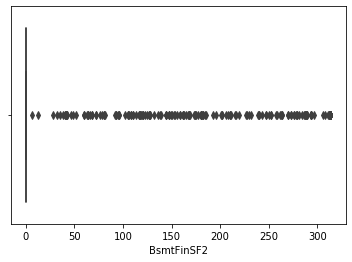

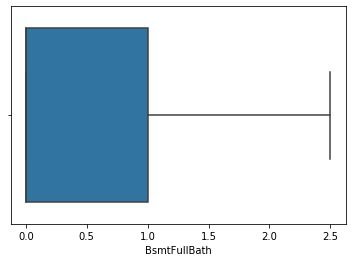

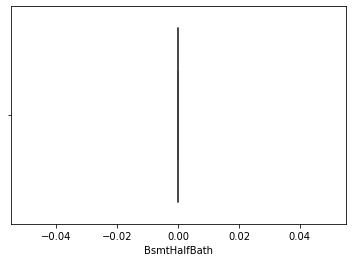

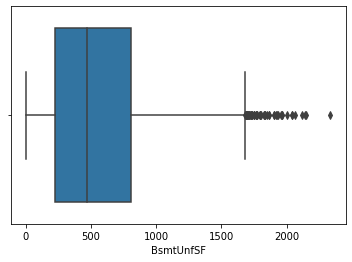

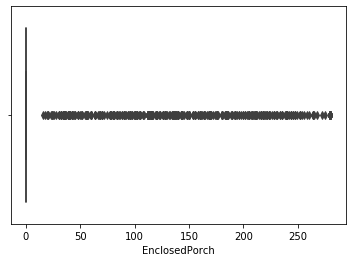

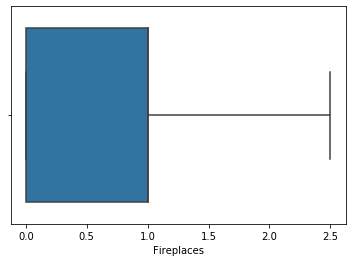

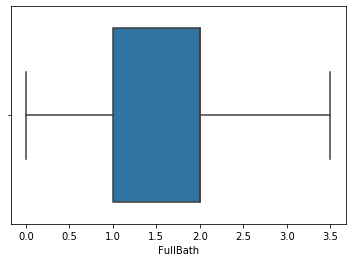

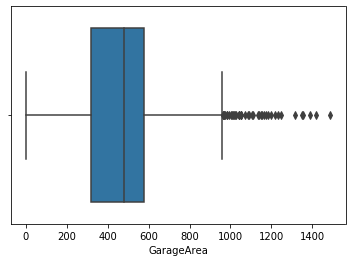

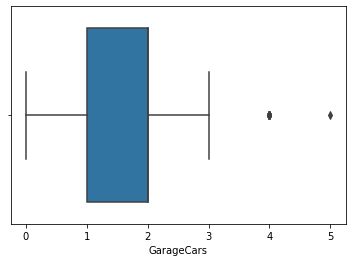

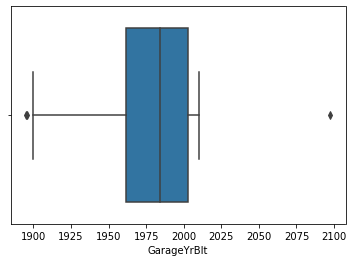

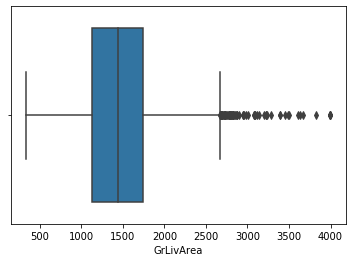

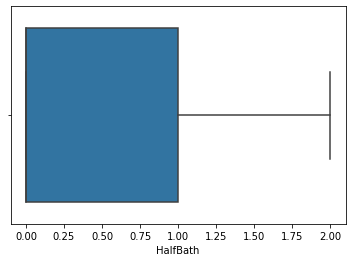

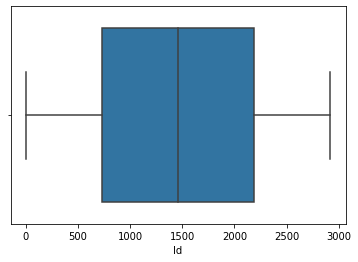

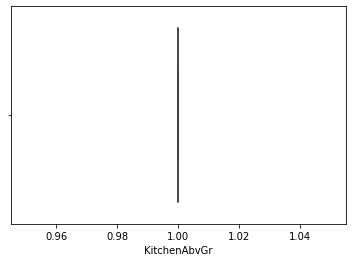

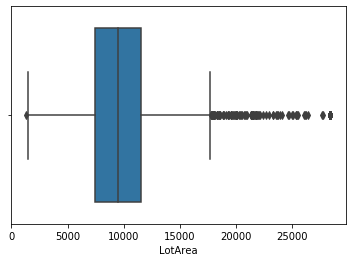

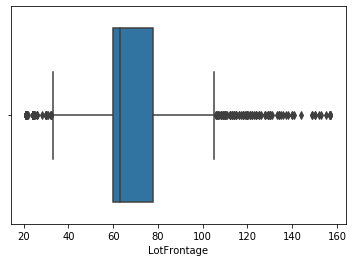

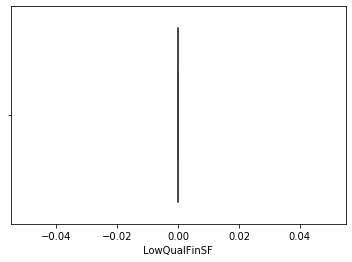

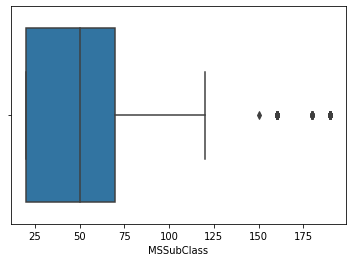

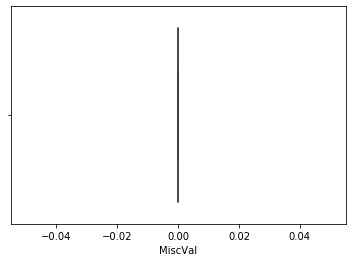

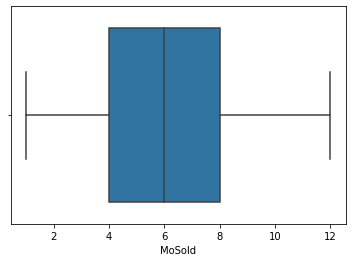

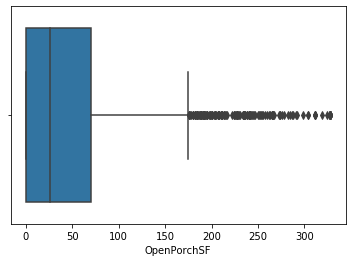

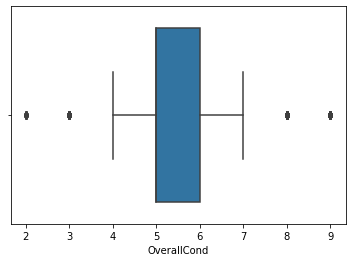

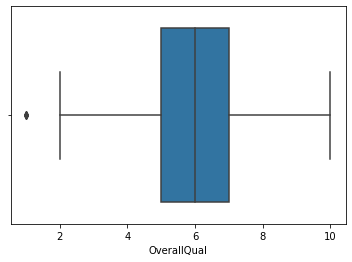

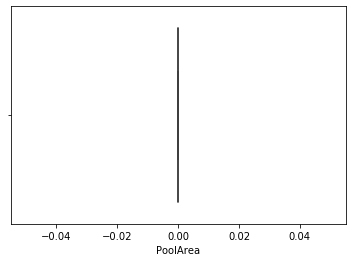

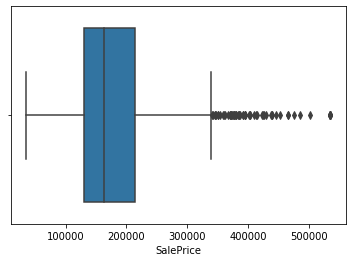

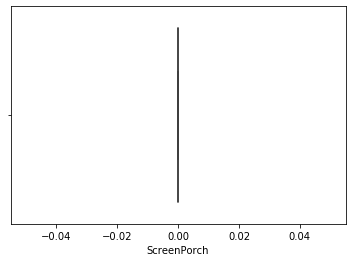

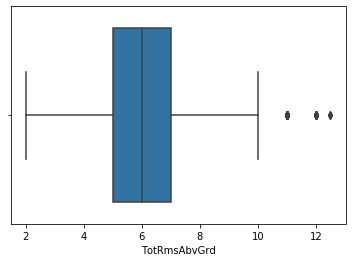

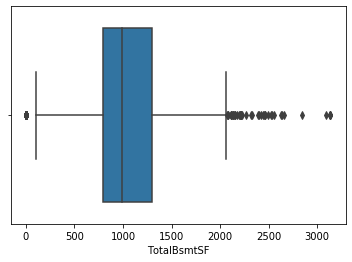

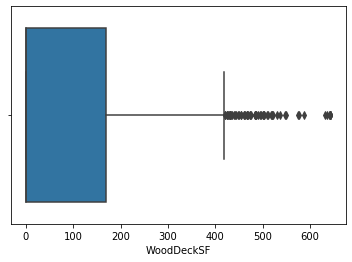

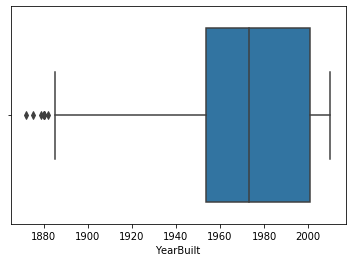

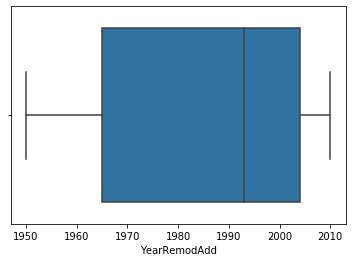

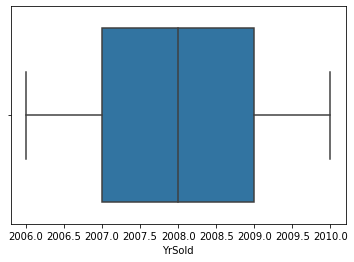

In [171]:
for i in num_cols:
    sns.boxplot(data[i])
    plt.show()

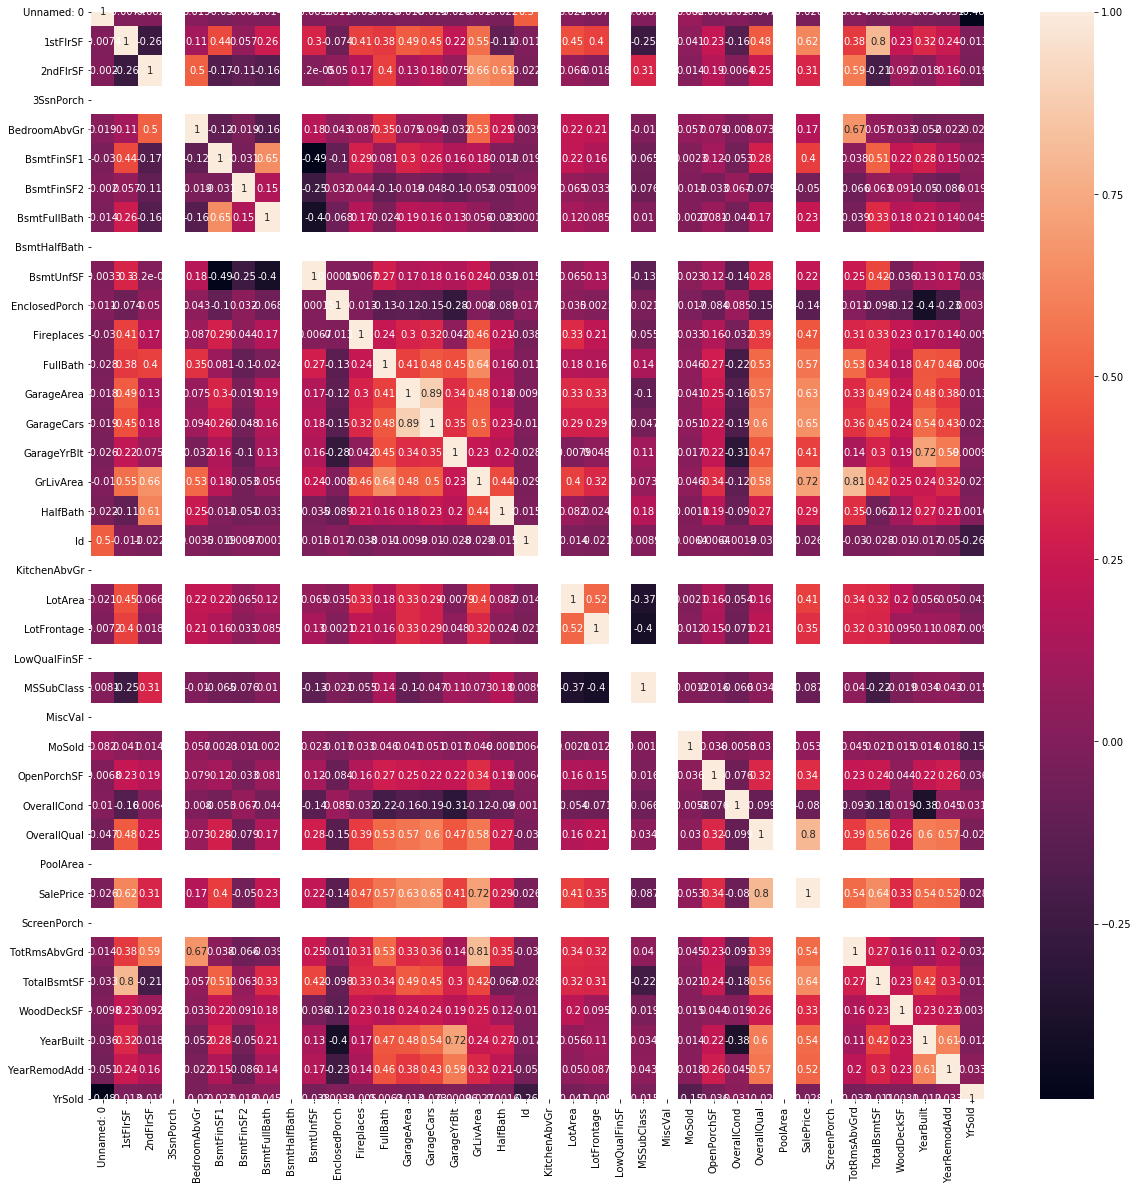

In [173]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [174]:
data.drop(['3SsnPorch','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','LowQualFinSF','MiscVal','KitchenAbvGr','PoolArea'],axis = 1,inplace = True)

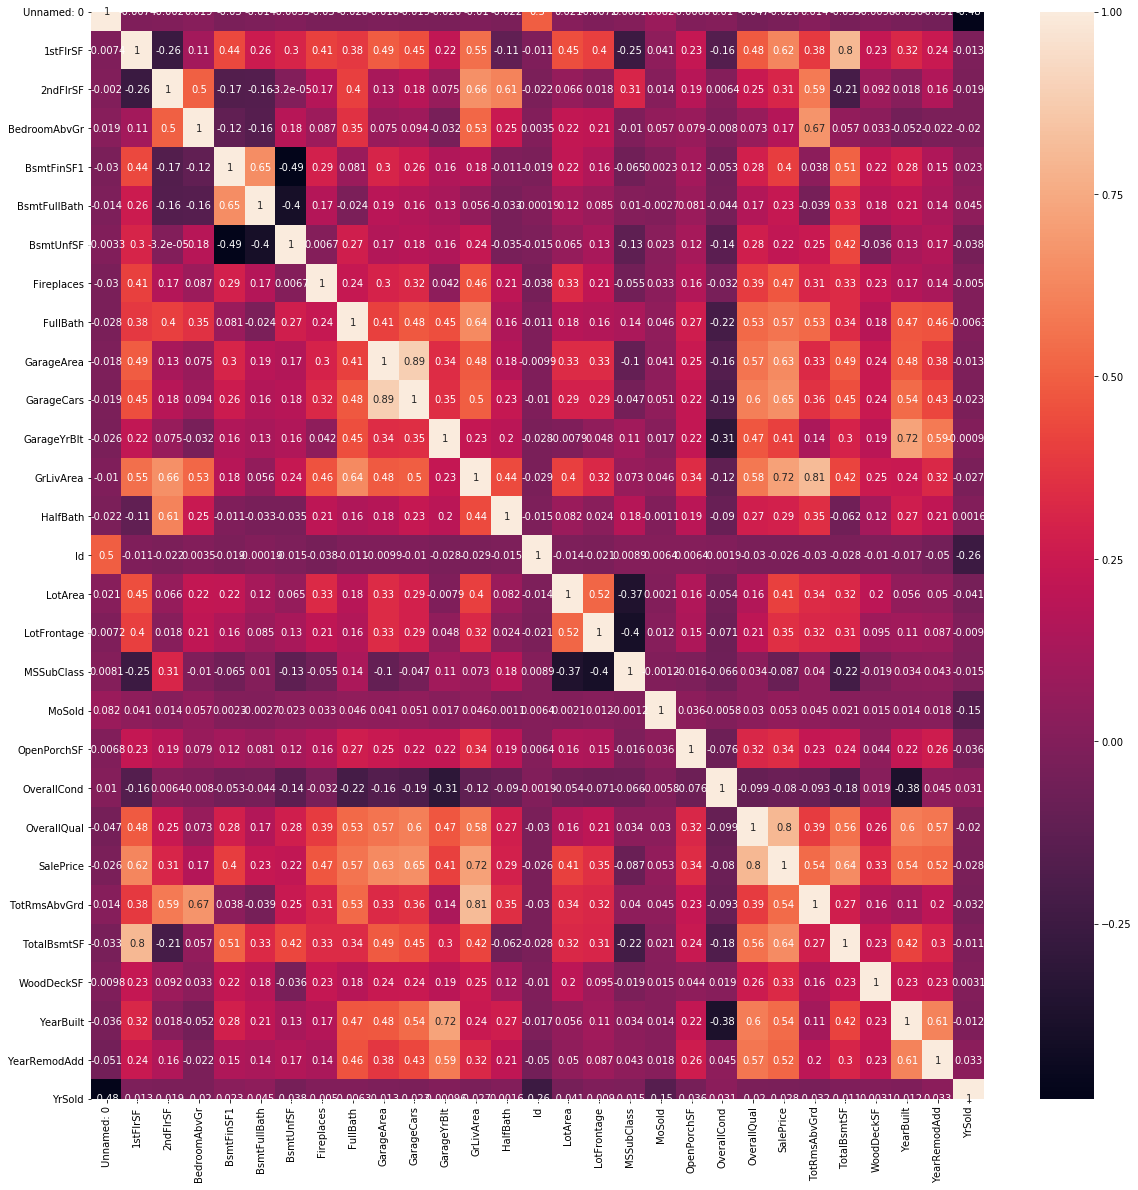

In [176]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [175]:
data.drop('ScreenPorch',axis  = 1,inplace = True)

In [177]:
# null value treatment 
pd.set_option('max_rows',80)
data.isna().sum()/len(data)*100

Unnamed: 0        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinSF1        0.000000
BsmtFinType1      0.000000
BsmtFinType2      0.000000
BsmtFullBath      0.000000
BsmtQual          0.000000
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
FireplaceQu       0.000000
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        0.000000
GarageFinish      0.000000
GarageType        0.000000
GarageYrBlt       0.000000
GrLivArea         0.000000
HalfBath          0.000000
Heating           0.000000
HeatingQC         0.000000
HouseStyle        0.000000
I

In [178]:
pd.get_dummies(data)

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0,856.0,854,3.0,706.0,1.0,150.0,0.0,2.0,548.0,...,0,0,0,0,0,0,0,1,0,1
1,1,1262.0,0,3.0,978.0,0.0,284.0,1.0,2.0,460.0,...,0,0,0,0,0,0,0,1,0,1
2,2,920.0,866,3.0,486.0,1.0,434.0,1.0,2.0,608.0,...,0,0,0,0,0,0,0,1,0,1
3,3,961.0,756,3.0,216.0,1.0,540.0,1.0,1.0,642.0,...,0,0,0,0,0,0,0,1,0,1
4,4,1145.0,1053,4.0,655.0,1.0,490.0,1.0,2.0,836.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,546.0,546,3.0,0.0,0.0,546.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2915,1455,546.0,546,3.0,252.0,0.0,294.0,0.0,1.0,286.0,...,0,0,0,0,0,0,0,1,0,1
2916,1456,1224.0,0,4.0,1224.0,1.0,0.0,1.0,1.0,576.0,...,0,0,0,0,0,0,0,1,0,1
2917,1457,970.0,0,3.0,337.0,0.0,575.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1


In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

In [210]:
data.shape
dt.drop('Unnamed: 0',axis = 1,inplace = True)

In [195]:
dt = data.iloc[:1460,:66]

In [196]:
dt.shape

(1460, 66)

In [221]:
dt= pd.get_dummies(dt)

In [222]:
X = dt.drop('SalePrice',axis = 1)
y = dt['SalePrice']

In [240]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 3)


In [241]:
xtrain_std = ss.fit_transform(x_train)
xtest_std = ss.fit_transform(x_test)

In [246]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
from sklearn.metrics import accuracy_score

In [248]:
print(f'R^2 score for train: {lr.score(x_train, y_train)}')

R^2 score for train: 0.9488585013102468


In [255]:
y_pred = lr.predict(x_test)

print(f'R^2 score for test: {lr.score(x_test,y_test)}')

R^2 score for test: 0.7810474583793485


In [250]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     80.23
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:10:17   Log-Likelihood:                -16503.
No. Observations:                1460   AIC:                         3.345e+04
Df Residuals:                    1238   BIC:                         3.462e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9220.8772   1.12e+05     -0.083      0.934   -2.28e+05     2.1e+05
1stFlrSF                -36.6181     15.350     -2.386      0.017     -66.732      -6.504
2ndFlrSF                -21.9789     14.384     -1.528      0.127     -50.198       6.240
BedroomAbvGr          -2966.7151   1257.064     -2.360      0.018   -5432.926    -500.505
BsmtFinSF1                6.5087      7.337      0.887      0.375      -7.885      20.902
BsmtFullBath           2400.9951   1745.407      1.376      0.169   -1023.288    5825.278
BsmtUnfSF               -10.4280      7.420     -1.405      0.160     -24.985       4.129
Fireplaces             3744.6334   1424.853      2.628      0.009     949.240    6540.027
FullBath               2524.2017   2044.370      1.235      0.217   -1486.611    6535.015
GarageArea               14.9918      7.191      2.085      0.037       0.883      29.100
GarageCars             3592.5839   2067.828      1.737      0.083    -464.251    7649.419
GarageYrBlt              41.0272     43.753      0.938      0.349     -44.810     126.864
GrLivArea                84.9264     15.163      5.601      0.000      55.178     114.675
HalfBath                888.9817   1947.339      0.457      0.648   -2931.469    4709.432
Id                       -0.3003      1.443     -0.208      0.835      -3.131       2.530
LotArea                   1.3209      0.237      5.581      0.000       0.857       1.785
LotFrontage              15.9937     42.418      0.377      0.706     -67.225      99.212
MSSubClass              -38.4455     75.481     -0.509      0.611    -186.530     109.639
MoSold                 -334.1132    227.326     -1.470      0.142    -780.099     111.873
OpenPorchSF              17.2241     11.114      1.550      0.121      -4.580      39.029
OverallCond            5665.1702    803.736      7.049      0.000    4088.334    7242.006
OverallQual            7349.8153    941.828      7.804      0.000    5502.061    9197.570
TotRmsAbvGrd            690.6174    866.111      0.797      0.425   -1008.590    2389.825
TotalBsmtSF              25.0642      7.986      3.139      0.002       9.397      40.732
WoodDeckSF               12.1069      5.412      2.237      0.025       1.489      22.725
YearBuilt               270.2640     69.405      3.894      0.000     134.100     406.428
YearRemodAdd             99.0714     51.461      1.925      0.054      -1.888     200.031
YrSold                 -426.2501    476.198     -0.895      0.371   -1360.495     507.995
BldgType_1Fam          1.037e+04    2.3e+04      0.450      0.653   -3.48e+04    5.55e+04
BldgType_2fmCon        1625.7990   2.33e+04      0.070      0.944    -4.4e+04    4.73e+04
BldgType_Duplex       -6635.5629   2.29e+04     -0.290      0.772   -5.16e+04    3.83e+04
BldgType_Twnhs        -

In [251]:
X1 =dt.drop(['TotRmsAbvGrd','YrSold','TotRmsAbvGrd','OpenPorchSF','MoSold','MSSubClass','LotFrontage','Id','HalfBath',
 'GarageYrBlt','GarageCars','FullBath','BsmtUnfSF','BsmtFullBath','BsmtFinSF1','2ndFlrSF','SalePrice'],axis =1)

In [252]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y,test_size = 0.5,random_state = 3)


In [253]:
X_constant1 = sm.add_constant(X1)
lin_reg1 = sm.OLS(y,X_constant1).fit()
lin_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     82.53
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:19:51   Log-Likelihood:                -16540.
No. Observations:                1460   AIC:                         3.349e+04
Df Residuals:                    1253   BIC:                         3.459e+04
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.025e+05   1.81e+04     -5.658      0.000   -1.38e+05    -6.7e+04
1stFlrSF                -15.6415      6.288     -2.488      0.013     -27.977      -3.306
BedroomAbvGr          -3339.6688   1153.330     -2.896      0.004   -5602.340   -1076.998
Fireplaces             4030.7559   1432.658      2.813      0.005    1220.083    6841.428
GarageArea               27.1257      4.582      5.920      0.000      18.137      36.115
GrLivArea                67.1318      4.765     14.088      0.000      57.783      76.480
LotArea                   1.3818      0.231      5.971      0.000       0.928       1.836
OverallCond            5470.2812    807.282      6.776      0.000    3886.508    7054.054
OverallQual            6833.7360    952.746      7.173      0.000    4964.582    8702.890
TotalBsmtSF              19.8206      3.670      5.400      0.000      12.620      27.021
WoodDeckSF               13.3216      5.473      2.434      0.015       2.584      24.060
YearBuilt               284.7526     68.188      4.176      0.000     150.977     418.528
YearRemodAdd            107.0597     51.349      2.085      0.037       6.321     207.799
BldgType_1Fam         -6115.2796   4027.660     -1.518      0.129    -1.4e+04    1786.421
BldgType_2fmCon       -1.708e+04   5471.014     -3.123      0.002   -2.78e+04   -6350.795
BldgType_Duplex       -2.307e+04   5441.028     -4.241      0.000   -3.37e+04   -1.24e+04
BldgType_Twnhs        -3.027e+04   5642.373     -5.364      0.000   -4.13e+04   -1.92e+04
BldgType_TwnhsE       -2.595e+04   4648.110     -5.584      0.000   -3.51e+04   -1.68e+04
BsmtCond_Fa           -3.518e+04   8628.915     -4.077      0.000   -5.21e+04   -1.83e+04
BsmtCond_Gd           -3.602e+04   8726.301     -4.127      0.000   -5.31e+04   -1.89e+04
BsmtCond_Po            -222.3817    2.1e+04     -0.011      0.992   -4.15e+04    4.11e+04
BsmtCond_TA           -3.107e+04   8434.078     -3.684      0.000   -4.76e+04   -1.45e+04
BsmtExposure_Av       -2.794e+04   4794.370     -5.827      0.000   -3.73e+04   -1.85e+04
BsmtExposure_Gd       -1.117e+04   4957.862     -2.253      0.024   -2.09e+04   -1441.658
BsmtExposure_Mn       -3.056e+04   4826.408     -6.331      0.000      -4e+04   -2.11e+04
BsmtExposure_No       -3.283e+04   4727.153     -6.945      0.000   -4.21e+04   -2.36e+04
BsmtFinType1_ALQ      -1.409e+04   3493.750     -4.032      0.000   -2.09e+04   -7231.258
BsmtFinType1_BLQ       -1.55e+04   3523.656     -4.399      0.000   -2.24e+04   -8587.972
BsmtFinType1_GLQ      -9079.6566   3561.534     -2.549      0.011   -1.61e+04   -2092.430
BsmtFinType1_LwQ      -2.239e+04   3802.794     -5.889      0.000   -2.99e+04   -1.49e+04
BsmtFinType1_Rec      -1.803e+04   3557.777     -5.068      0.000    -2.5e+04   -1.11e+04
BsmtFinType1_Unf       

In [256]:
lr1 = LinearRegression()
lr1.fit(x_train1,y_train1)
print(f'R^2 score for train: {lr1.score(x_train1, y_train1)}')
y_pred1 = lr1.predict(x_test1)

print(f'R^2 score for test: {lr1.score(x_test1,y_test1)}')

R^2 score for train: 0.9454117528774403
R^2 score for test: 0.781039309550458


In [258]:
y_pred_train =lr1.predict(x_train1)
y_pred_test = lr1.predict(x_test1)
from sklearn.metrics import r2_score, mean_squared_error
print(f'R^2 score for train: {r2_score(y_train1, y_pred_train)}')
print(f'R^2 score for test: {r2_score(y_test1, y_pred_test)}')

R^2 score for train: 0.9454117528774403
R^2 score for test: 0.781039309550458


In [260]:
print(r2_score(y_train1, lr1.predict(x_train1))) # training data performance
print(r2_score(y_test1, lr1.predict(x_test1))) # test data performance


0.9454117528774403
0.781039309550458


In [261]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

18903.89965892175

In [263]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 19627.878429843495
Mean Squared Error: 1148737323.7957132
Root Mean Squared Error: 33893.027657553896


In [264]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [266]:
print(r2_score(y_train, rf.predict(x_train))) # training data performance
print(r2_score(y_test, rf.predict(x_test))) # test data performance


0.9709262000712783
0.807985746259761


In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
pd.DataFrame({'vif': vif}, index=X1.columns).sort_values(by ='vif' , ascending= True)

,vif
WoodDeckSF,1.420417
OverallCond,2.484612
Fireplaces,2.591606
BedroomAbvGr,2.711592
GarageArea,2.968079
...,...
Exterior2nd_CBlock,inf
Exterior2nd_CmentBd,inf
Exterior2nd_HdBoard,inf
Exterior1st_Plywood,inf


In [ ]:
XC = sm.add_constant(X1)
LR = sm.OLS(y,XC).fit()

In [268]:
while(len(dt.columns)>0):
    xc = sm.add_constant(X1)
    ols = sm.OLS(y,xc)
    mod = ols.fit()
    f = mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max() >0.05:
        X1 = X1.drop(columns=f)
    else:
        break
        
print('The final features ',X1.columns)

The final features  Index(['BedroomAbvGr', 'Fireplaces', 'GarageArea', 'GrLivArea', 'LotArea',
       'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       ...
       'RoofMatl_ClyTile', 'RoofMatl_WdShngl', 'RoofStyle_Gable',
       'SaleCondition_Abnorml', 'SaleCondition_Partial', 'SaleType_COD',
       'SaleType_New', 'SaleType_WD', 'Street_Grvl', 'Street_Pave'],
      dtype='object', length=116)


In [269]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:41:37   Log-Likelihood:                -16592.
No. Observations:                1460   AIC:                         3.338e+04
Df Residuals:                    1360   BIC:                         3.391e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.242e+05   1.84e+04     -6.742      0.000    -1.6e+05   -8.81e+04
BedroomAbvGr          -3702.0457   1056.938     -3.503      0.000   -5775.452   -1628.640
Fireplaces             4242.5866   1338.849      3.169      0.002    1616.153    6869.020
GarageArea               27.2371      3.976      6.850      0.000      19.437      35.037
GrLivArea                54.9339      2.302     23.862      0.000      50.418      59.450
LotArea                   1.2656      0.212      5.964      0.000       0.849       1.682
OverallCond            6260.6326    662.844      9.445      0.000    4960.325    7560.940
OverallQual            6339.5520    868.067      7.303      0.000    4636.657    8042.447
TotalBsmtSF              16.6036      2.004      8.286      0.000      12.673      20.534
WoodDeckSF               12.2524      5.202      2.355      0.019       2.048      22.457
YearBuilt               357.7037     52.322      6.837      0.000     255.064     460.343
BldgType_1Fam         -9111.4218   3916.235     -2.327      0.020   -1.68e+04   -1428.904
BldgType_2fmCon       -2.017e+04   5166.197     -3.905      0.000   -3.03e+04      -1e+04
BldgType_Duplex       -2.454e+04   4920.529     -4.987      0.000   -3.42e+04   -1.49e+04
BldgType_Twnhs         -3.86e+04   5210.821     -7.407      0.000   -4.88e+04   -2.84e+04
BldgType_TwnhsE       -3.182e+04   4403.345     -7.227      0.000   -4.05e+04   -2.32e+04
BsmtCond_Gd           -5671.2361   2879.794     -1.969      0.049   -1.13e+04     -21.916
BsmtExposure_Av        -3.42e+04   4826.947     -7.085      0.000   -4.37e+04   -2.47e+04
BsmtExposure_Gd       -1.793e+04   5001.525     -3.586      0.000   -2.77e+04   -8122.684
BsmtExposure_Mn       -3.505e+04   4868.344     -7.199      0.000   -4.46e+04   -2.55e+04
BsmtExposure_No       -3.706e+04   4736.349     -7.826      0.000   -4.64e+04   -2.78e+04
BsmtFinType1_ALQ      -1.792e+04   3515.668     -5.098      0.000   -2.48e+04    -1.1e+04
BsmtFinType1_BLQ      -1.871e+04   3521.937     -5.311      0.000   -2.56e+04   -1.18e+04
BsmtFinType1_GLQ      -1.327e+04   3539.114     -3.748      0.000   -2.02e+04   -6322.413
BsmtFinType1_LwQ      -2.579e+04   3749.272     -6.879      0.000   -3.31e+04   -1.84e+04
BsmtFinType1_Rec      -2.096e+04   3539.474     -5.921      0.000   -2.79e+04    -1.4e+04
BsmtFinType1_Unf       -2.76e+04   3344.568     -8.252      0.000   -3.42e+04    -2.1e+04
BsmtFinType2_ALQ      -1.691e+04   5648.507     -2.995      0.003    -2.8e+04   -5833.928
BsmtFinType2_BLQ      -2.385e+04   4599.974     -5.184      0.000   -3.29e+04   -1.48e+04
BsmtFinType2_GLQ       -1.52e+04   6243.136     -2.435      0.015   -2.74e+04   -2952.119
BsmtFinType2_LwQ      -2.286e+04   4413.906     -5.179      0.000   -3.15e+04   -1.42e+04
BsmtFinType2_Rec      -